# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random heights (in cm) between 140 and 200
heights = np.random.randint(140, 200, 100)

# Generate weights using a linear formula with some noise
weights = np.round(0.5 * heights + np.random.normal(0, 5, 100), 2)  # Adding normal noise

# Create a DataFrame
df = pd.DataFrame({'Height(cm)': heights, 'Weight(kg)': weights})

# Save as CSV
df.to_csv("./data/height_weight_data.csv", index=False)


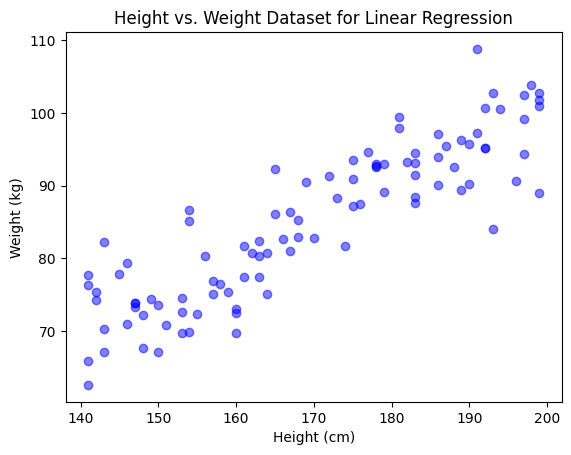

In [5]:
# Plot the dataset
plt.scatter(df["Height(cm)"], df["Weight(kg)"], color="blue", alpha=0.5)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight Dataset for Linear Regression")
plt.show()